<a href="https://colab.research.google.com/github/hDepth/Checkpoint-02-Redes-Neurais-com-Keras-Vis-o-Computacional/blob/main/regressao_california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Célula 1 – Cabeçalho e imports***

In [ ]:
# ============================================================
# 🧠 Checkpoint 02 - Parte 01: Redes Neurais com Keras
# Exercício 2 - Regressão (California Housing Dataset)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers


# ***Célula 2 – Carregar o dataset***

In [ ]:
# 1️⃣ Carregando o dataset California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

print("Dimensões:", X.shape)
print("Atributos:", housing.feature_names)


Dimensões: (20640, 8)
Atributos: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# ***Célula 3 – Pré-processamento***

In [ ]:
# 2️⃣ Normalizando os dados e dividindo entre treino e teste
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# ***Célula 4 – Construir e treinar a rede neural***

In [ ]:
# 3️⃣ Construindo a Rede Neural (Keras)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2, verbose=0)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (Rede Neural): {mae:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (Rede Neural): 0.3553


# ***Célula 5 – Comparar com modelos do Scikit-learn***

In [ ]:
# 4️⃣ Comparação com modelos Scikit-learn

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# Métricas
mae_lr = mean_absolute_error(y_test, pred_lr)
mae_rf = mean_absolute_error(y_test, pred_rf)

print(f"Erro Médio Absoluto (LinearRegression): {mae_lr:.4f}")
print(f"Erro Médio Absoluto (RandomForest): {mae_rf:.4f}")


Erro Médio Absoluto (LinearRegression): 0.5332
Erro Médio Absoluto (RandomForest): 0.3276


# ***Célula 6 – Comparativo e gráfico***

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


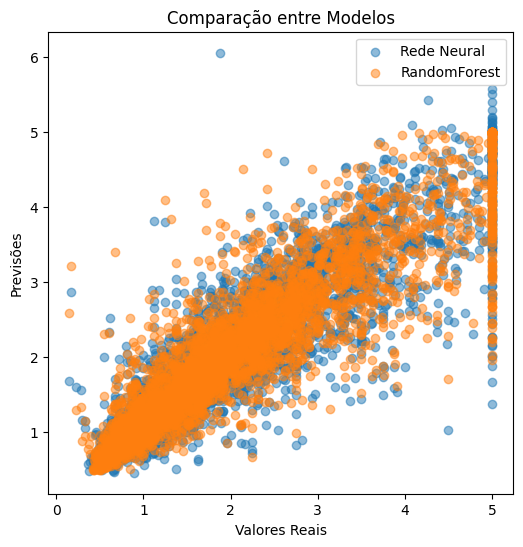

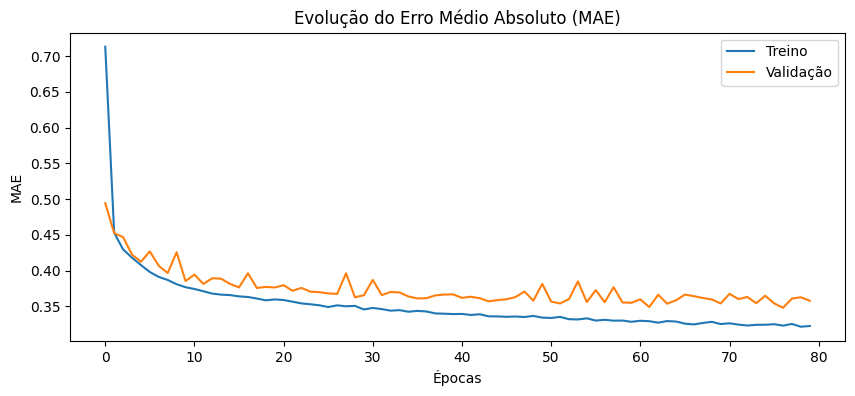

In [ ]:
# 5️⃣ Comparativo e visualização

pred_nn = model.predict(X_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_nn, alpha=0.5, label='Rede Neural')
plt.scatter(y_test, pred_rf, alpha=0.5, label='RandomForest')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Comparação entre Modelos')
plt.legend()
plt.show()

# Gráfico do histórico de treino
plt.figure(figsize=(10,4))
plt.plot(history.history['mae'], label='Treino')
plt.plot(history.history['val_mae'], label='Validação')
plt.title('Evolução do Erro Médio Absoluto (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()


# ***Célula 7 – Conclusão***

In [ ]:
print("""
✅ Conclusão:
A rede neural conseguiu prever valores próximos aos reais,
com erro médio competitivo em relação aos modelos tradicionais.

Linear Regression é simples e rápido.
RandomForest costuma performar melhor em dados tabulares.
Keras permite capturar relações mais complexas com ajustes de camadas e épocas.
""")



✅ Conclusão:
A rede neural conseguiu prever valores próximos aos reais, 
com erro médio competitivo em relação aos modelos tradicionais.

Linear Regression é simples e rápido.
RandomForest costuma performar melhor em dados tabulares.
Keras permite capturar relações mais complexas com ajustes de camadas e épocas.

